In [213]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import hicstraw
np.set_printoptions(suppress=True)

In [214]:
cell_line = 'GM12878'
resolution = "1Mb"
resolution_num = 1000000
figsize = 100
input_path = f"/media/jordan990301/Samsung_T5/HiC_Datasets/juicer_outputs/{cell_line}/{resolution}"
hic_path = f"/media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic"

In [215]:
# chrom_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']
chrom_list = ['1']
chrom_name = "1"

In [216]:
hic = hicstraw.HiCFile(hic_path)
print(hic.getGenomeID())
print(hic.getResolutions())

hg19
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 1000]


In [217]:
selected_chromosome_size = None

for chrom in hic.getChromosomes():
    print(chrom.name, chrom.length)
    if (chrom.name == chrom_name):
        selected_chromosome_size = int(chrom.length)

print(f"\n{selected_chromosome_size}")

All 3098789
1 249250621
2 243199373
3 198022430
4 191154276
5 180915260
6 171115067
7 159138663
8 146364022
9 141213431
10 135534747
11 135006516
12 133851895
13 115169878
14 107349540
15 102531392
16 90354753
17 81195210
18 78077248
19 59128983
20 63025520
21 48129895
22 51304566
X 155270560
Y 59373566
MT 16569

249250621


In [218]:
matrix_oe = hic.getMatrixZoomData(chrom_name, chrom_name, "oe", "KR", "BP", resolution_num)
matrix_oe_np = matrix_oe.getRecordsAsMatrix(0, selected_chromosome_size, 0, selected_chromosome_size)

matrix_oe_df = pd.DataFrame(matrix_oe_np)
matrix_oe_df = matrix_oe_df.dropna(axis=0, how="all").reset_index(drop=True)
matrix_oe_df = matrix_oe_df.dropna(axis=1, how="all")
matrix_oe_np = matrix_oe_df.values # Turn into numpy format

In [219]:
for chrom in chrom_list:
    # Read in the Pearson correlatin matrix
    pearson_df = pd.read_table(f"{input_path}/pearson_chr{chrom}.txt", header=None, sep=" ")
    pearson_df.pop(pearson_df.columns[-1])
    pearson_df = pearson_df.dropna(axis=0, how="all").reset_index(drop=True)
    pearson_df = pearson_df.dropna(axis=1, how="all")
    pearson_np = pearson_df.values # Turn into numpy format

    # Read in the Eigenvector 1
    EV1_df = pd.read_table(f"{input_path}/pc1_chr{chrom}.txt", header=None, sep=" ")
    EV1_df = EV1_df.dropna(axis=0, how="all").reset_index(drop=True)
    EV1_np = EV1_df.values # Turn into numpy format
    EV1_np = EV1_np.flatten() # Turn into 1D vector

    if len(pearson_np) == len(EV1_np) and len(pearson_np) == len(pearson_np[0]):
        # According the steps in SVD, set x as pearson_df, and set y as x' / np.sqrt(n)
        n = len(pearson_np)
        pearson_T_np = np.transpose(pearson_np)
        y_np = pearson_T_np / np.sqrt(n)
        cov_np = np.matmul(np.transpose(y_np), y_np) # Covariance matrix of pearson_df


<Axes: >

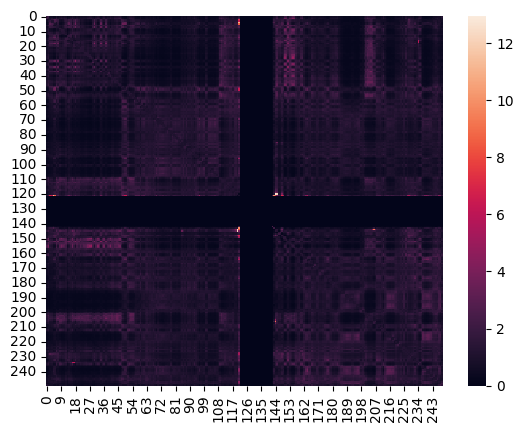

In [220]:
sns.heatmap(matrix_oe_np)

<Axes: >

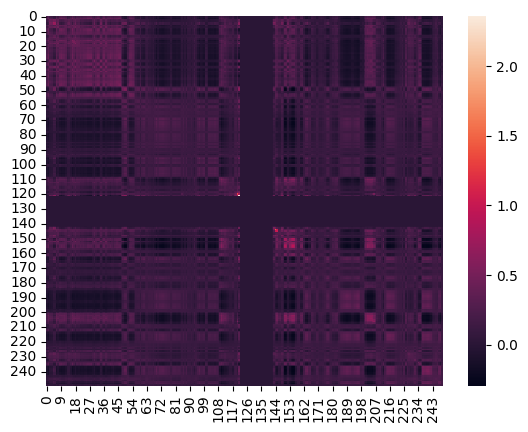

In [221]:
sns.heatmap(np.cov(matrix_oe_np))

/home/jordan990301/miniconda3/envs/py3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/jordan990301/miniconda3/envs/py3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

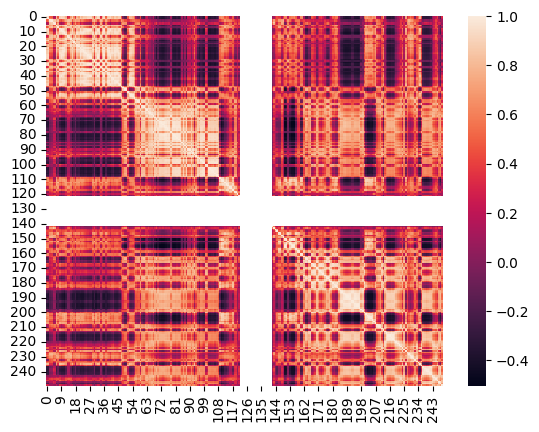

In [222]:
sns.heatmap(np.corrcoef(matrix_oe_np))

<Axes: >

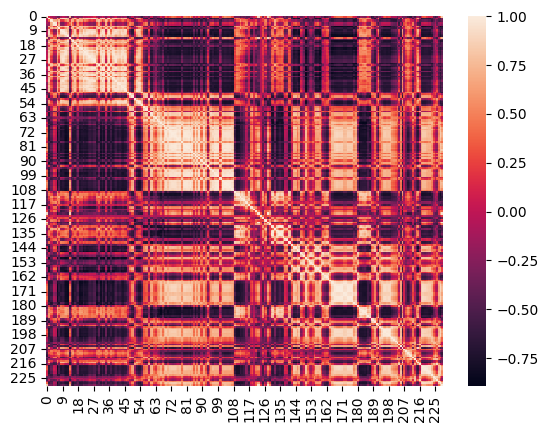

In [223]:
sns.heatmap(pearson_np)

<Axes: >

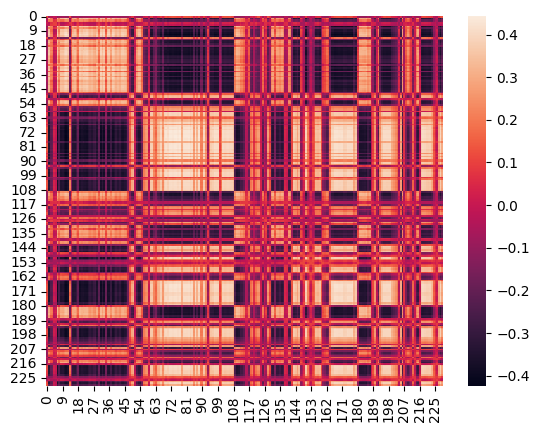

In [224]:
sns.heatmap(cov_np)

<Axes: >

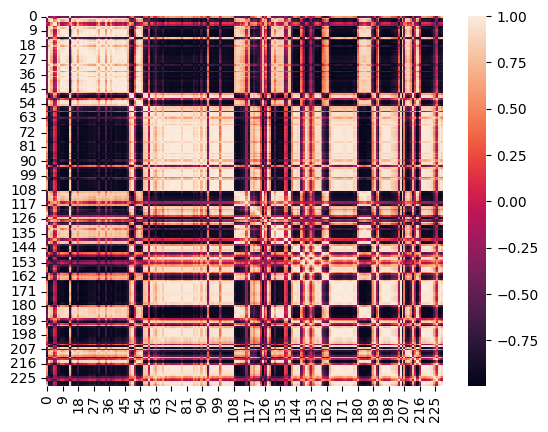

In [225]:
sns.heatmap(np.corrcoef(pearson_np))